# Wholesale Customers Segmentation - Association Rules Mining

---

## 1. Introduction

This notebook explores the **Wholesale Customers Dataset** with the aim to perform **Association Rule Mining**. The goal is to discover interesting relationships and buying patterns between product categories.

---

## 2. Data Loading and Preprocessing

We load the dataset and perform initial preprocessing including checking for missing values and transforming numeric data into a suitable format for association mining.

---

## 3. Exploratory Data Analysis (EDA)

We conduct statistical summaries and visualizations to understand data distributions, relationships between features, and detect potential anomalies.

---

## 4. Frequent Itemset Mining using Apriori Algorithm

Since association rule mining requires binary data, we convert numerical values to binary indicators based on whether the value exceeds the median for each feature. We then apply the Apriori algorithm to find frequent itemsets.

---

## 5. Generating Association Rules

Using the frequent itemsets, we generate association rules and calculate metrics such as **support**, **confidence**, and **lift** to evaluate the strength of the rules.

---

## 6. Filtering Strong Rules

To focus on meaningful insights, we filter rules with high confidence and lift values (lift > 1 indicates positive association).

---

## 7. Visualization of Association Rules

We visualize the support vs confidence of strong rules, with the size of the points representing the lift, to better understand the quality and distribution of rules.

---

## 8. Exporting Association Rules

Strong association rules are exported to a CSV file for further analysis or reporting purposes.

---

## 9. Interactive Dashboard for Rule Filtering

An interactive dashboard is built using `ipywidgets` to allow dynamic filtering of rules based on user-selected minimum support and confidence thresholds, enabling easy exploration of different sets of rules.


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None
/nMissing values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64
/nSummary Statistics:


,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


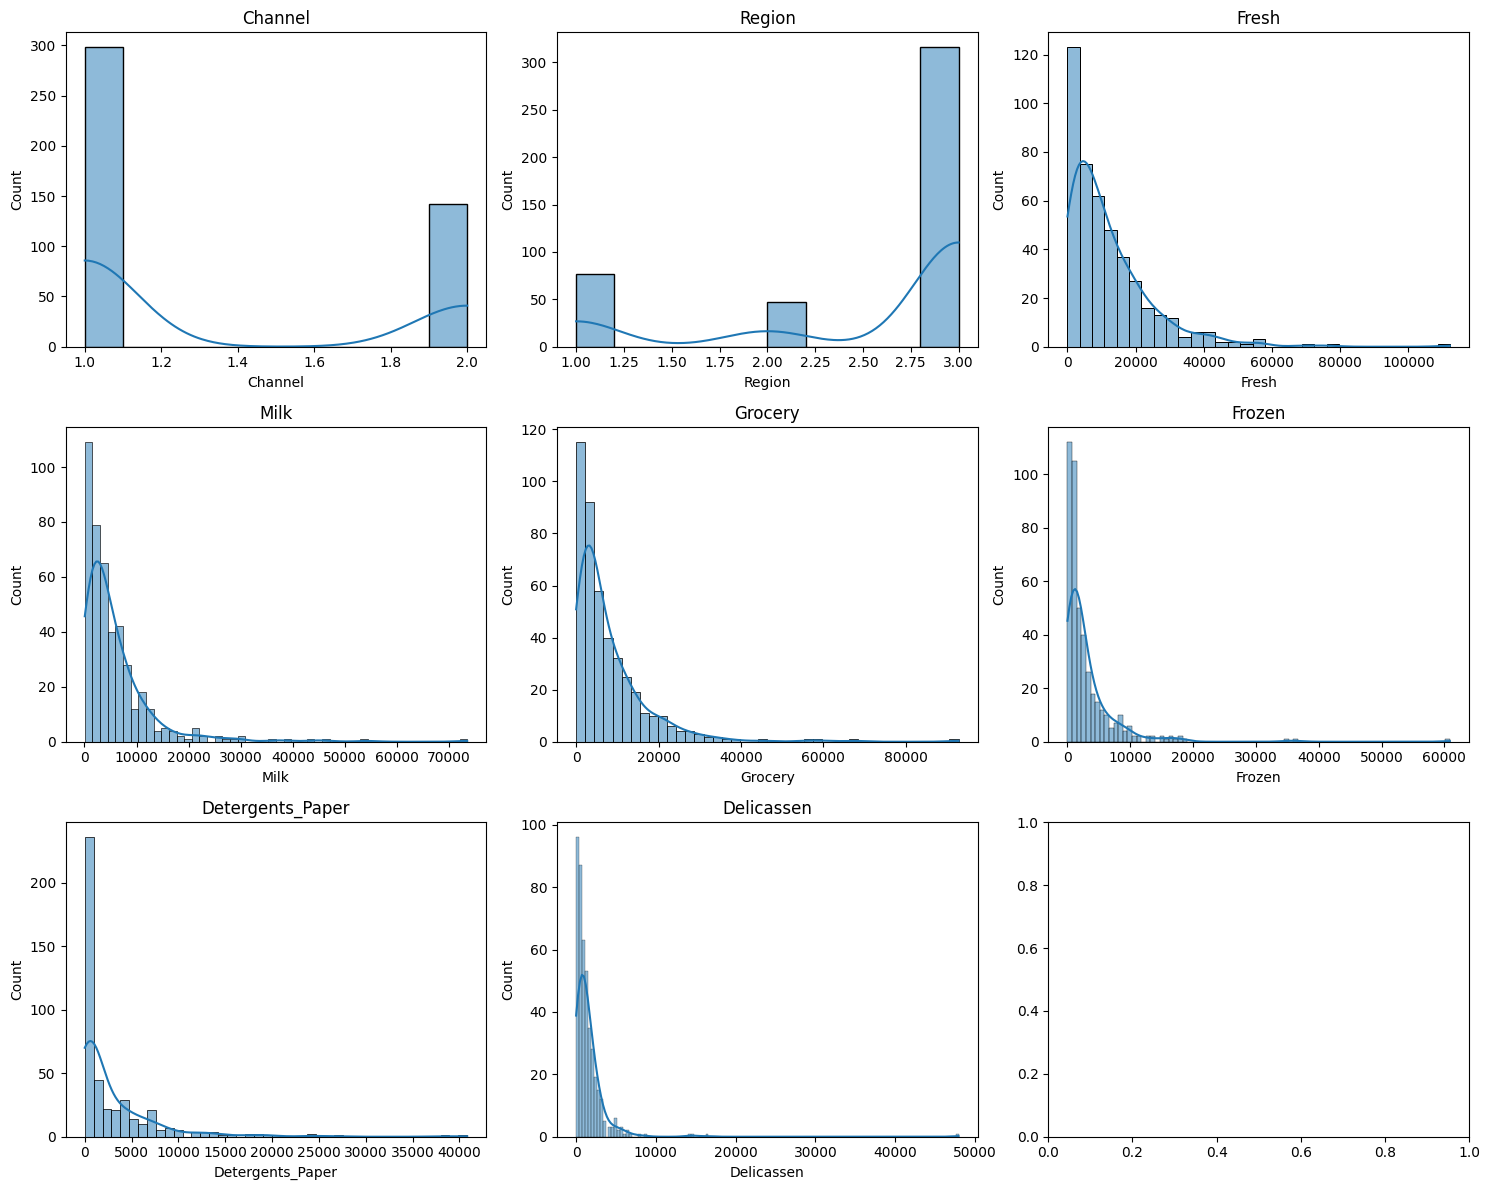

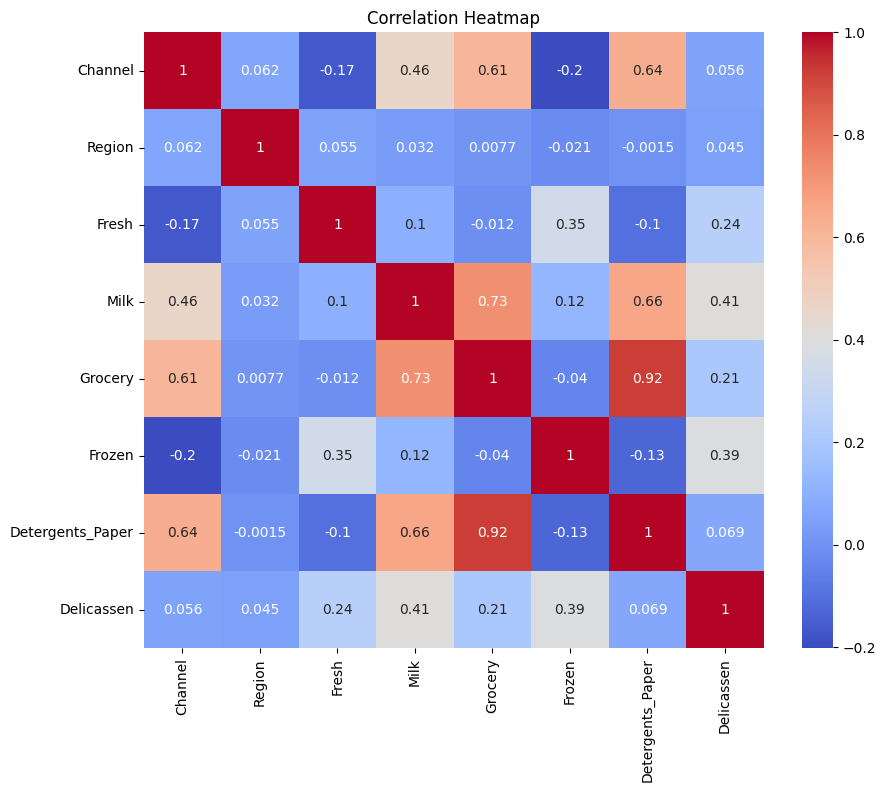

Found 17 frequent itemsets
Generated 28 association rules


c:\Users\yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
17,"(Detergents_Paper, Channel)",(Grocery),0.309091,0.500000,0.304545,0.985294,1.970588,1.0,0.150000,34.000000,0.712883,0.603604,0.970588,0.797193
1,(Channel),(Grocery),0.322727,0.500000,0.313636,0.971831,1.943662,1.0,0.152273,17.750000,0.716856,0.616071,0.943662,0.799552
18,"(Grocery, Channel)",(Detergents_Paper),0.313636,0.500000,0.304545,0.971014,1.942029,1.0,0.147727,17.250000,0.706731,0.598214,0.942029,0.790053
3,(Channel),(Detergents_Paper),0.322727,0.500000,0.309091,0.957746,1.915493,1.0,0.147727,11.833333,0.705685,0.601770,0.915493,0.787964
21,(Channel),"(Grocery, Detergents_Paper)",0.322727,0.411364,0.304545,0.943662,2.293985,1.0,0.171787,10.448295,0.832866,0.708995,0.904291,0.841997


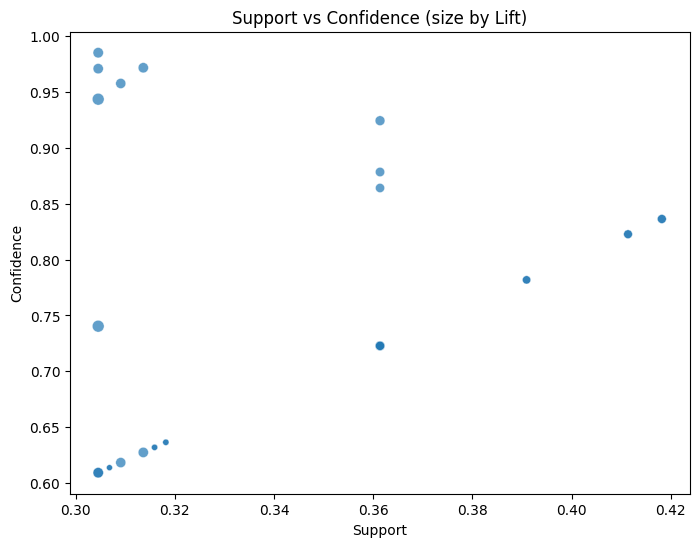

In [ ]:
# Wholesale_Customers_Segmentation.ipynb

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import MinMaxScaler
import ipywidgets as widgets
from IPython.display import display, clear_output

# 1. Load data
data_path = 'C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/datasets/clustering/wholesale_customers.csv'
df = pd.read_csv(data_path)

# 2. Preprocessing & EDA
print("Data Info:")
print(df.info())
print("/nMissing values:")
print(df.isnull().sum())

print("/nSummary Statistics:")
display(df.describe().T)

# Plot distributions
fig, axes = plt.subplots(3, 3, figsize=(15,12))
axes = axes.flatten()
for i, col in enumerate(df.columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 3. Frequent Itemset Mining prep
# We must convert numerical columns into binary 'purchased or not' based on some threshold
# Here, we binarize columns: if value > median, mark 1 else 0 (you can tune this)
df_bin = df.apply(lambda x: x > x.median()).astype(int)

# 4. Find frequent itemsets
frequent_itemsets = apriori(df_bin, min_support=0.3, use_colnames=True)

print(f"Found {len(frequent_itemsets)} frequent itemsets")

# 5. Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

print(f"Generated {len(rules)} association rules")

# 6. Filter strong rules (lift > 1)
strong_rules = rules[rules['lift'] > 1].sort_values(by='confidence', ascending=False)
display(strong_rules.head())

# 7. Visualization of rules

plt.figure(figsize=(8,6))
sns.scatterplot(x="support", y="confidence", size="lift", data=strong_rules, legend=False, alpha=0.7)
plt.title("Support vs Confidence (size by Lift)")
plt.xlabel("Support")
plt.ylabel("Confidence")
plt.show()

# # 8. Export strong rules to CSV
# strong_rules.to_csv("strong_association_rules.csv", index=False)

# 9. Interactive dashboard for filtering rules by support & confidence

support_slider = widgets.FloatSlider(min=0.1, max=1.0, step=0.05, value=0.3, description='Min Support:')
confidence_slider = widgets.FloatSlider(min=0.1, max=1.0, step=0.05, value=0.6, description='Min Confidence:')

output = widgets.Output()

def update_rules(change):
    with output:
        clear_output(wait=True)
        min_support = support_slider.value
        min_confidence = confidence_slider.value
        
        # Filter frequent itemsets and rules
        freq_sets = apriori(df_bin, min_support=min_support, use_colnames=True)
        assoc_rules = association_rules(freq_sets, metric="confidence", min_threshold=min_confidence)
        filtered_rules = assoc_rules[assoc_rules['lift'] > 1].sort_values(by='confidence', ascending=False)
        
        print(f"Showing {len(filtered_rules)} rules with support>={min_support} and confidence>={min_confidence}")
        display(filtered_rules.head(10))

support_slider.observe(update_rules, names='value')
confidence_slider.observe(update_rules, names='value')

display(widgets.VBox([support_slider, confidence_slider, output]))

# Initial update call
update_rules(None)
